In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
%matplotlib inline

In [2]:

data = pd.read_csv("nba_2017_players_with_salary_wiki_twitter.csv");data.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


Text(0, 0.5, '$AGE$')

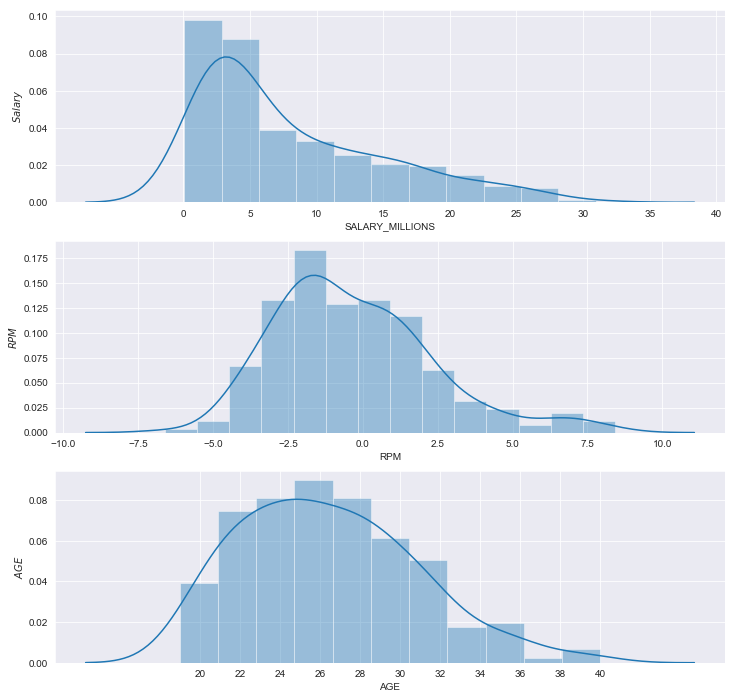

In [3]:
#1. Histogram Distribution 

sns.set_style('darkgrid') 
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)  
sns.distplot(data['SALARY_MILLIONS'])
plt.xticks(np.linspace(0,40,9))
plt.ylabel(u'$Salary$',size=10)

plt.subplot(3,1,2)
sns.distplot(data['RPM'])
plt.xticks(np.linspace(-10,10,9))
plt.ylabel(u'$RPM$',size=10)

plt.subplot(3,1,3)
sns.distplot(data['AGE'])
plt.xticks(np.linspace(20,40,11))
plt.ylabel(u'$AGE$',size=10)

C:\Users\yuyuy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


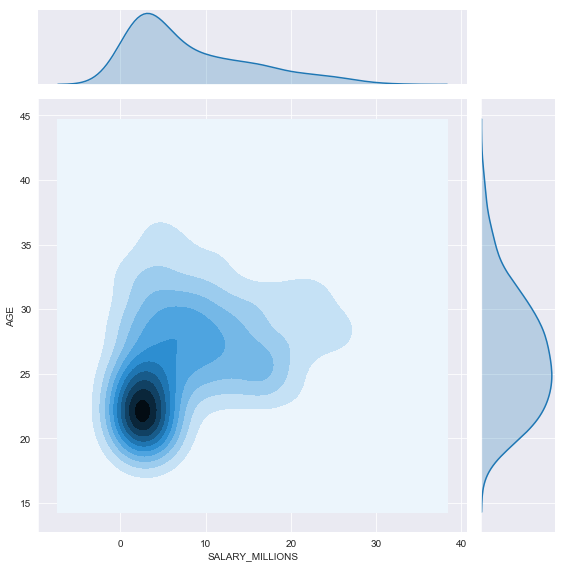

In [4]:
# 2. Jointplot

data_two_var=data.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.jointplot(data_two_var.SALARY_MILLIONS,data_two_var.AGE,kind='kde',size=8) 



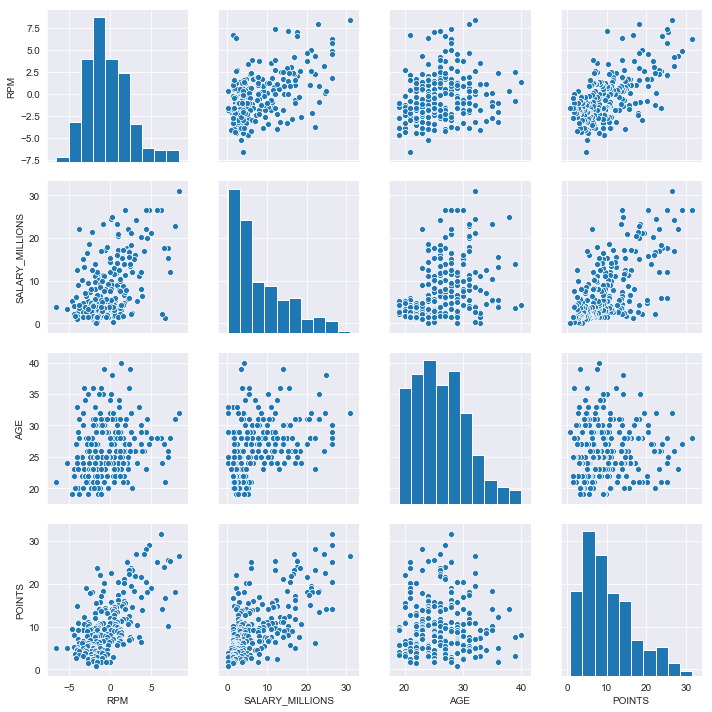

In [5]:
# 3. Pairplot

data_mult_var=data.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.pairplot(data_mult_var) 

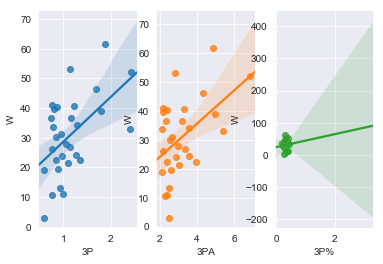

In [10]:
# 4. REgPLot
data3t = data3.groupby(['TEAM']).mean().sort_values(by='3PA',ascending=False).head(31) # 选NBA中的30只球队，再去掉有转会的球员的数据
data3t = data3t.drop(index = 'NO/SAC') 

fig, axes = plt.subplots(1, 3)
sns.regplot(x="3P", y="W", data=data3t, ax=axes[0])
sns.regplot(x="3PA", y="W", data=data3t, ax=axes[1])
sns.regplot(x="3P%", y="W", data=data3t, ax=axes[2])


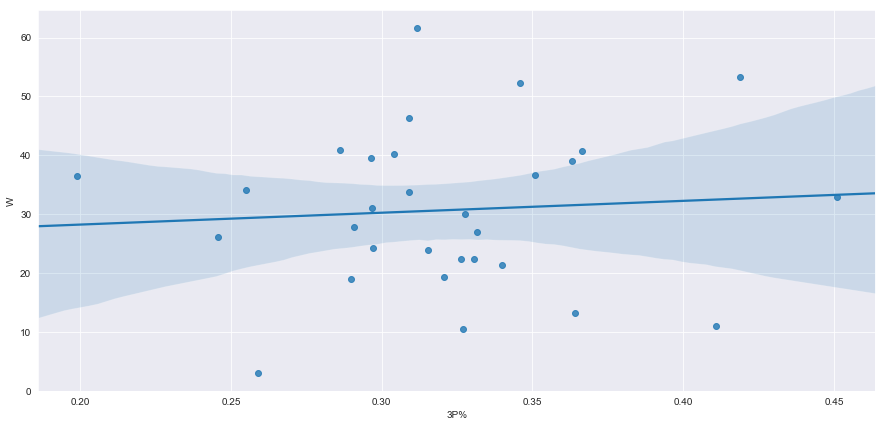

In [11]:
# Regplot

plt.figure(figsize=(15,7))
sns.regplot(x="3P%", y="W", data=data3t)


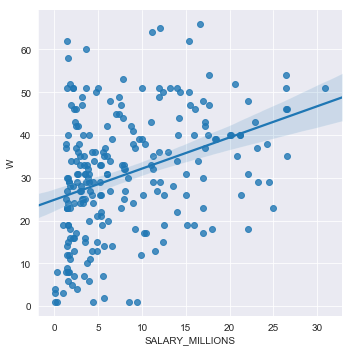

In [12]:
# 5. LMPLot
sns.lmplot(x="SALARY_MILLIONS", y="W", data=data)

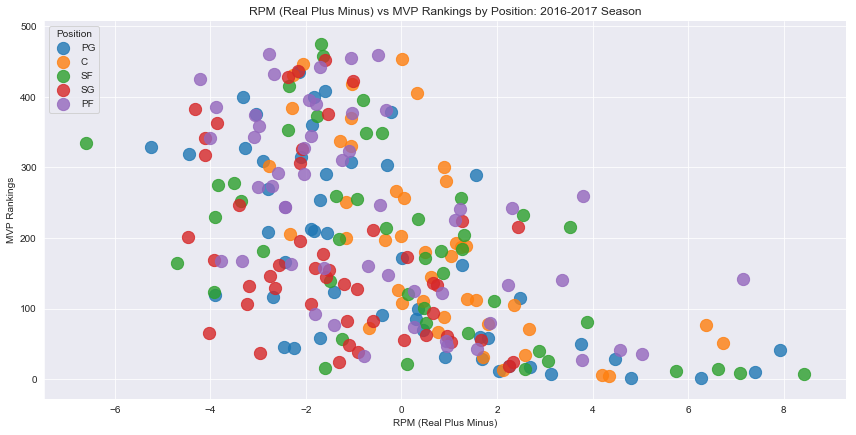

In [13]:
# 5. LMPlot
ax = sns.lmplot(x="RPM", y="Rk", data=data, hue='POSITION', fit_reg=False, height=6, aspect=2, legend=False, scatter_kws={"s": 150})
ax.set(xlabel='RPM (Real Plus Minus)', ylabel='MVP Rankings', title="RPM (Real Plus Minus) vs MVP Rankings by Position: 2016-2017 Season")
plt.legend(loc='upper left', title='Position')


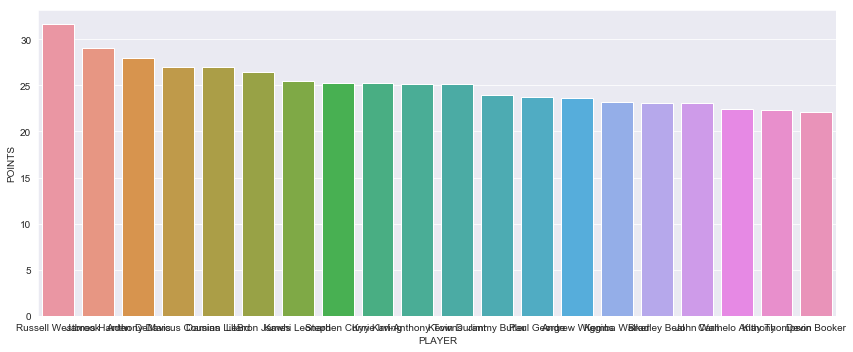

In [14]:
# 6. Barplot
mvp = data.sort_values('Rk',ascending=True).head(20)
list(mvp) 
fig = plt.figure(figsize=(12,5))
sns.barplot(x="PLAYER",y="POINTS",data=mvp.sort_values('POINTS',ascending=False))
plt.tight_layout()
plt.show()


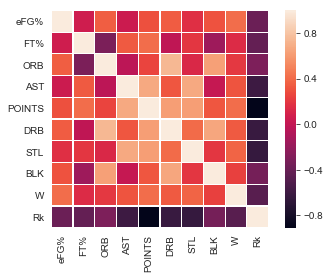

In [16]:
# 7, Heatmap
gen = data[["eFG%","FT%","ORB","AST","POINTS","DRB","STL","BLK","W","Rk"]].copy()
gen.corr()
coor=gen.corr()
sns.heatmap(coor,square=True, linewidths=0.2, annot=False) 


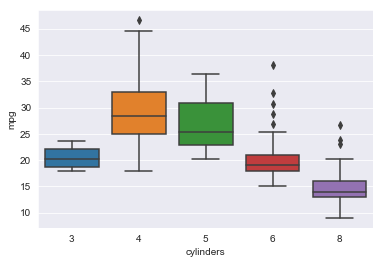

In [17]:
# 8. Boxplot
auto = pd.read_pickle('auto.pkl')
sns.boxplot(x='cylinders', y='mpg', data=auto) 

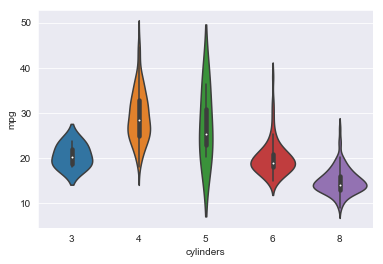

In [18]:
# 9. Violinplot
sns.violinplot(x='cylinders', y='mpg', data=auto) 

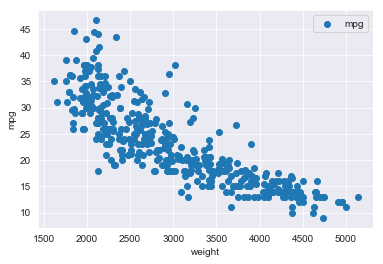

In [19]:
# 10. ScatterPlot
plt.scatter(auto['weight'],auto['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.show()